# Title

## Feature Selection and Model Tuning for Mobile Features Data

# Problem Statement
Predicting the price of a mobile phone based on historical data as well as features can be a useful use case for mobile companies. Using the features that are part of a mobile phone, one can exploit the data that is already available and regress it to find the prices of future mobile prices. Also, it can be useful for determining whether a phone is rightly priced or not. However, it is important to understand which features impact the performance of our model and also what parameters of our model when tuned efficiently give a good overall performance for our predictions. Thus, understanding the features and model parameters is essential for the model building process for optimal performance.


In [615]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
from sklearn.feature_selection import f_regression,SelectKBest,SelectFromModel,mutual_info_regression,RFE,VarianceThreshold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [616]:
pd.options.display.max_columns = None

In [617]:
mobile=pd.read_excel(r'C:\Users\HP\Downloads\phone_dataset++%281%29.xlsx')

In [618]:
mobile

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofoc

In [619]:
mobile.head()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofoc

In [620]:
mobile.shape

(8631, 40)

In [621]:
mobile.columns

Index(['brand', 'model', 'network_technology', '2G_bands', '3G_bands',
       '4G_bands', 'network_speed', 'GPRS', 'EDGE', 'announced', 'status',
       'dimentions', 'weight_g', 'weight_oz', 'SIM', 'display_type',
       'display_resolution', 'display_size', 'OS', 'CPU', 'Chipset', 'GPU',
       'memory_card', 'internal_memory', 'RAM', 'primary_camera',
       'secondary_camera', 'loud_speaker', 'audio_jack', 'WLAN', 'bluetooth',
       'GPS', 'NFC', 'radio', 'USB', 'sensors', 'battery', 'colors',
       'approx_price_EUR', 'img_url'],
      dtype='object')

 Total number of data points are  8631  we have 40 columns.


In [623]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   brand               8631 non-null   object
 1   model               8631 non-null   object
 2   network_technology  8631 non-null   object
 3   2G_bands            8631 non-null   object
 4   3G_bands            4858 non-null   object
 5   4G_bands            1605 non-null   object
 6   network_speed       4885 non-null   object
 7   GPRS                8599 non-null   object
 8   EDGE                8608 non-null   object
 9   announced           8616 non-null   object
 10  status              8631 non-null   object
 11  dimentions          8612 non-null   object
 12  weight_g            7682 non-null   object
 13  weight_oz           7679 non-null   object
 14  SIM                 8628 non-null   object
 15  display_type        8627 non-null   object
 16  display_resolution  7417

In [624]:
mobile.columns

Index(['brand', 'model', 'network_technology', '2G_bands', '3G_bands',
       '4G_bands', 'network_speed', 'GPRS', 'EDGE', 'announced', 'status',
       'dimentions', 'weight_g', 'weight_oz', 'SIM', 'display_type',
       'display_resolution', 'display_size', 'OS', 'CPU', 'Chipset', 'GPU',
       'memory_card', 'internal_memory', 'RAM', 'primary_camera',
       'secondary_camera', 'loud_speaker', 'audio_jack', 'WLAN', 'bluetooth',
       'GPS', 'NFC', 'radio', 'USB', 'sensors', 'battery', 'colors',
       'approx_price_EUR', 'img_url'],
      dtype='object')

[]

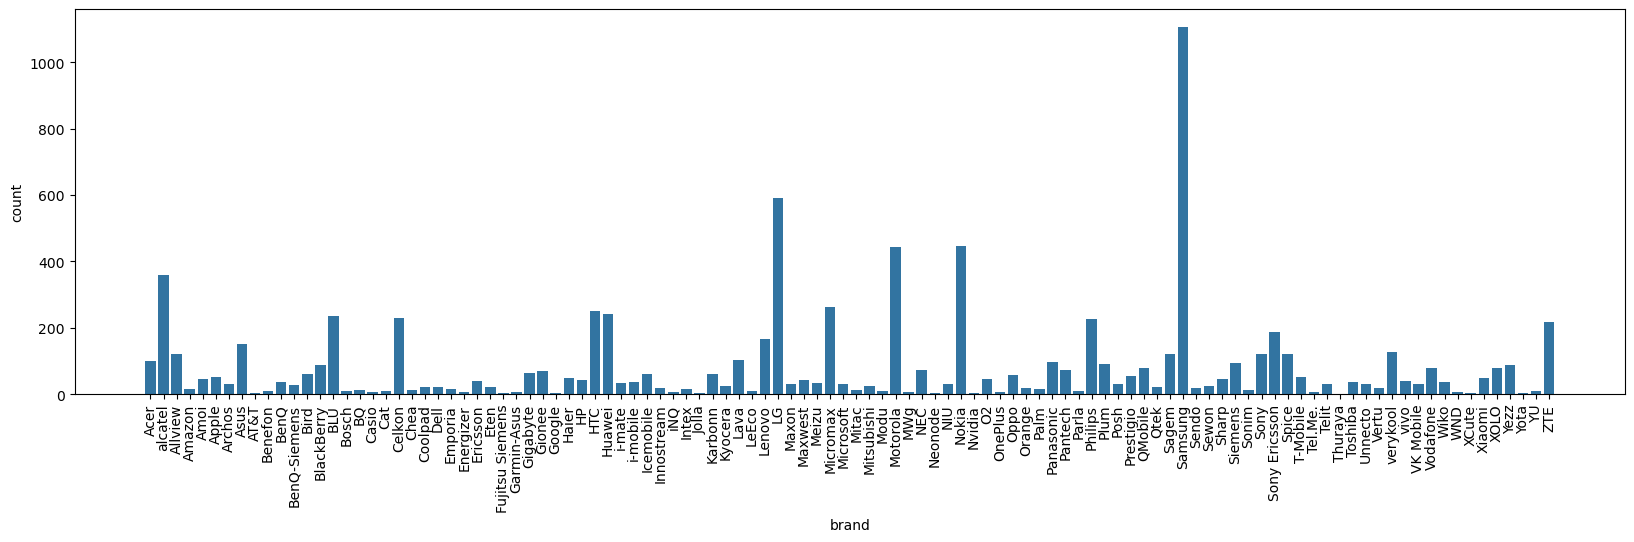

In [625]:
# Below plot shows the different brand names and no of phones
plt.figure(figsize=(20,5))
sns.countplot(x=mobile['brand'])
plt.xticks(rotation=90)
plt.plot()

In [626]:
mobile.describe()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
count,8631,8631,8631,8631,4858,1605,4885,8599,8608,8616,8631,8612,7682,7679.00,8628,8627,7417,8584,4908,4836,3692,3493,8629,6809,4658,7438,7407,8630,8563,8627,8612,8602,795,8535,7728,4591,8628,8029,5006,8631
unique,108,8275,38,209,579,627,195,53,51,711,135,6609,893,386.00,86,235,2981,864,553,558,538,139,204,395,211,673,369,20,7,173,111,96,51,97,101,115,1050,2615,112,8349
top,Samsung,A10,GSM,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 2100,LTE,HSPA 21.1/5.76 Mbps,Yes,Yes,2005 1Q,Discontinued,-,90,3.17,Mini-SIM,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Qualcomm MSM8916 Snapdragon 410,Mali-400,No,8 GB,1 GB RAM,2 MP,No,Yes,Yes,No,No,No,Yes,No,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion battery,Black,70,http://cdn2.gsmarena.com/vv/bigpic/htc-one-m8.jpg
freq,1105,5,3507,2257,1115,173,751,3549,3245,151,3637,331,186,193.00,4449,1644,57,485,481,365,123,401,2124,919,1449,788,3263,6557,5055,3826,1613,4086,668,3490,3398,1138,720,2023,302,5


In [627]:
mobile.isna().sum() #missing Value

brand                    0
model                    0
network_technology       0
2G_bands                 0
3G_bands              3773
4G_bands              7026
network_speed         3746
GPRS                    32
EDGE                    23
announced               15
status                   0
dimentions              19
weight_g               949
weight_oz              952
SIM                      3
display_type             4
display_resolution    1214
display_size            47
OS                    3723
CPU                   3795
Chipset               4939
GPU                   5138
memory_card              2
internal_memory       1822
RAM                   3973
primary_camera        1193
secondary_camera      1224
loud_speaker             1
audio_jack              68
WLAN                     4
bluetooth               19
GPS                     29
NFC                   7836
radio                   96
USB                    903
sensors               4040
battery                  3
c

In [628]:
pd.value_counts( mobile['dimentions'])

dimentions
-                                               331
108 x 46 x 15.3 mm (4.25 x 1.81 x 0.60 in)       12
68 x 39 x 22 mm (2.68 x 1.54 x 0.87 in)           8
102 x 44 x 18 mm (4.02 x 1.73 x 0.71 in)          8
76 x 44 x 23 mm (2.99 x 1.73 x 0.91 in)           8
                                               ... 
115 x 59 x 15 mm (4.53 x 2.32 x 0.59 in)          1
123 x 61.5 x 11.9 mm (4.84 x 2.42 x 0.47 in)      1
121.9 x 64 x 16 mm (4.80 x 2.52 x 0.63 in)        1
105 x 53 x 15.7 mm (4.13 x 2.09 x 0.62 in)        1
106 x 45.6 x 18.1 mm (4.17 x 1.80 x 0.71 in)      1
Name: count, Length: 6609, dtype: int64

Dimensions columns has 331 "-" values replace them with NaN

In [630]:
mobile['dimentions'].replace("-",np.nan,inplace=True)

In [631]:
# Finding the number of null values for every brand with  corresponding columns
mobile.groupby('brand').apply(lambda x: x.isna().sum()).head(10)

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT&T,0,0,0,0,1,4,1,0,0,0,0,0,1,1,0,0,1,0,1,1,3,4,0,1,2,0,0,0,0,0,0,0,4,0,0,4,0,0,4,0
Acer,0,0,0,0,23,79,22,0,0,0,0,2,7,7,0,0,0,0,0,1,10,19,0,2,3,0,4,0,0,0,0,2,93,0,0,5,1,0,5,0
Allview,0,0,0,0,16,79,15,0,0,0,0,0,6,6,0,0,0,0,5,2,39,10,0,6,5,1,1,0,2,0,7,7,117,1,0,4,0,0,56,0
Amazon,0,0,0,0,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,0,0,2,2,0,0,0,0,0,13,0,0,0,0,0,0,0
Amoi,0,0,0,0,36,47,35,0,3,0,0,0,13,13,0,0,10,0,42,46,47,47,0,14,46,14,14,0,0,0,0,0,47,0,9,47,0,10,47,0
Apple,0,0,0,0,20,28,20,0,0,0,0,0,0,0,0,0,0,0,0,2,3,10,0,6,7,16,16,0,0,1,0,0,26,0,0,0,0,0,0,0
Archos,0,0,0,0,0,15,0,0,0,0,0,2,4,4,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,18,0
Asus,0,0,0,0,52,91,50,0,0,2,0,1,7,8,1,0,1,0,12,15,24,34,0,5,15,4,4,0,0,0,0,0,132,2,0,26,0,1,24,0
BLU,0,0,0,0,61,189,61,0,0,0,0,1,4,4,0,0,0,14,57,57,97,60,0,3,22,5,5,0,0,0,0,0,232,6,0,58,0,0,132,0


In [632]:

def fill_missing_values(ph, column):
    # Fill missing values in the specified column
    ph[column] = ph[column].apply(
        lambda x: np.random.choice(ph[column].dropna()) if pd.isnull(x) else x
    )
    return ph

In [633]:
fill_missing_values(mobile,'GPRS')
fill_missing_values(mobile,'3G_bands')
fill_missing_values(mobile,'4G_bands')
fill_missing_values(mobile,'network_speed')
fill_missing_values(mobile,'EDGE')
fill_missing_values(mobile,'announced')
fill_missing_values(mobile,'dimentions')
fill_missing_values(mobile,'weight_g')
fill_missing_values(mobile,'weight_oz')
fill_missing_values(mobile,'SIM')
fill_missing_values(mobile,'display_type')
fill_missing_values(mobile,'display_resolution')
fill_missing_values(mobile,'display_size')
fill_missing_values(mobile,'OS')
fill_missing_values(mobile,'CPU')
fill_missing_values(mobile,'Chipset')
fill_missing_values(mobile,'GPU')
fill_missing_values(mobile,'memory_card')
fill_missing_values(mobile,'internal_memory')
fill_missing_values(mobile,'RAM')
fill_missing_values(mobile,'primary_camera')
fill_missing_values(mobile,'secondary_camera')
fill_missing_values(mobile,'loud_speaker')
fill_missing_values(mobile,'audio_jack')
fill_missing_values(mobile,'WLAN')
fill_missing_values(mobile,'bluetooth')
fill_missing_values(mobile,'GPS')
fill_missing_values(mobile,'NFC')
fill_missing_values(mobile,'radio')
fill_missing_values(mobile,'USB')
fill_missing_values(mobile,'sensors')
fill_missing_values(mobile,'battery')
fill_missing_values(mobile,'colors')
fill_missing_values(mobile,'approx_price_EUR')

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes (market/operator dependent),FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,116 x 45 x 24 mm (4.57 x 1.77 x 0.94 in),95,3.99,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,UMTS 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 20(800)| 3...,HSPA LTE Cat4 150/50 Mbps,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),189,Wi-Fi),No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,No,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1

In [634]:
mobile.isna().sum()

brand                 0
model                 0
network_technology    0
2G_bands              0
3G_bands              0
4G_bands              0
network_speed         0
GPRS                  0
EDGE                  0
announced             0
status                0
dimentions            0
weight_g              0
weight_oz             0
SIM                   0
display_type          0
display_resolution    0
display_size          0
OS                    0
CPU                   0
Chipset               0
GPU                   0
memory_card           0
internal_memory       0
RAM                   0
primary_camera        0
secondary_camera      0
loud_speaker          0
audio_jack            0
WLAN                  0
bluetooth             0
GPS                   0
NFC                   0
radio                 0
USB                   0
sensors               0
battery               0
colors                0
approx_price_EUR      0
img_url               0
dtype: int64

In [635]:
## Now remaining null values will be filled with top values of the entire data frame
columns=['model','img_url','announced','status','weight_oz']

mobile.drop(columns,axis=1,inplace=True)

In [636]:
data.isna().sum()

brand                 0
network_technology    0
2G_bands              0
3G_bands              0
4G_bands              0
network_speed         0
GPRS                  0
EDGE                  0
dimentions            0
weight_g              0
SIM                   0
display_type          0
display_resolution    0
display_size          0
OS                    0
CPU                   0
Chipset               0
GPU                   0
memory_card           0
internal_memory       0
RAM                   0
primary_camera        0
secondary_camera      0
loud_speaker          0
audio_jack            0
WLAN                  0
bluetooth             0
GPS                   0
NFC                   0
radio                 0
USB                   0
sensors               0
battery               0
colors                0
approx_price_EUR      0
Dual SIM              0
Micro-SIM             0
dual stand-by         0
Nano-SIM              0
Mini-SIM              0
dual active           0
dtype: int64

In [637]:

def network_technology(x):
    default_values=dict(zip(["GSM","HSPA", "LTE", "UMTS", "EVDO", "CDMA","CDMA2000","No cellular connectivity"],["NO","NO","NO","NO","NO","NO","NO","NO"]))
    networks=x.split('/')
    for i in networks:
        i=i.strip()
        default_values[i]="YES"
    return default_values


seri=mobile['network_technology'].apply(lambda x:network_technology(x))
network_types=pd.DataFrame(list(seri),dtype='str')

mobile=mobile.merge(network_types,right_index=True,left_index=True)


In [638]:
li = ["Dual SIM", "Micro-SIM", "dual stand-by", "Nano-SIM", "Mini-SIM", "dual active"]
values = ["NO", "NO", "NO", "NO", "NO", "NO"]

def SIMdetails(string):
    if not isinstance(string, str):
        return dict(zip(li, values))
    default_values = dict(zip(li, values))
    if string == "No":
        return default_values
    else:
        features = [x for x in li if x in string]
        for i in features:
            default_values[i] = "YES"
        return default_values

seri = mobile['SIM'].apply(lambda string: SIMdetails(string))
SIM_types = pd.DataFrame(list(seri))  # Use pd.DataFrame here

mobile = mobile.merge(SIM_types, right_index=True, left_index=True)



In [639]:
mobile.head()

,brand,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes (market/operator dependent),FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,NO,YES,NO,NO
1,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
2,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,116 x 45 x 24 mm (4.57 x 1.77 x 0.94 in),95,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,Acer,No cellular connectivity,N/A,UMTS 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 20(800)| 3...,HSPA LTE Cat4 150/50 Mbps,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),189,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,No,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes wi

In [640]:
mobile['approx_price_EUR']=pd.to_numeric(mobile['approx_price_EUR'], errors='coerce')

In [641]:
mobile['approx_price_EUR']=mobile['approx_price_EUR'].fillna(mobile['approx_price_EUR'].mode()[0])

In [642]:
mobile['approx_price_EUR']=mobile['approx_price_EUR'].astype(int)

In [643]:
mobile

,brand,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes (market/operator dependent),FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,NO,YES,NO,NO
1,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
2,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,116 x 45 x 24 mm (4.57 x 1.77 x 0.94 in),95,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,Acer,No cellular connectivity,N/A,UMTS 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 20(800)| 3...,HSPA LTE Cat4 150/50 Mbps,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),189,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,No,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes wi

In [644]:
#Separating Feature and Target
Feature=mobile.drop(columns=['approx_price_EUR'])
Target=mobile['approx_price_EUR']

In [645]:
data.shape

(8631, 41)

In [646]:
Feature.shape,Target.shape


((8631, 48), (8631,))

In [647]:
Feature=Feature.astype('str')

In [648]:
## We can remove network_technology, SIM columns as we have extracted the info already
Feature.drop(columns=['network_technology','SIM'],inplace=True)
Feature.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes (market/operator dependent),FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,NO,YES,NO,NO
1,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
2,Acer,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,116 x 45 x 24 mm (4.57 x 1.77 x 0.94 in),95,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,YES,YES,YES,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO
3,Acer,N/A,UMTS 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 20(800)| 3...,HSPA LTE Cat4 150/50 Mbps,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),189,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,No,Yes,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,Acer,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,YES,YES,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO


In [789]:
data

,brand,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,YES,YES,NO,YES,NO,NO
1,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250,YES,YES,YES,NO,NO,NO
2,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,141.5 x 69.9 x 7.9 mm (5.57 x 2.75 x 0.31 in),79,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120,YES,YES,YES,NO,NO,NO
3,Acer,No cellular connectivity,N/A,HSDPA 850 / 900 / 1900 / 2100,LTE band 4(1700/2100),HSPA,No,No,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),95,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,Yes with A-GPS,Yes (6038Y model),No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,NO,NO,NO,NO,NO,NO
4,Acer,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,Yes,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230,NO,YES,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

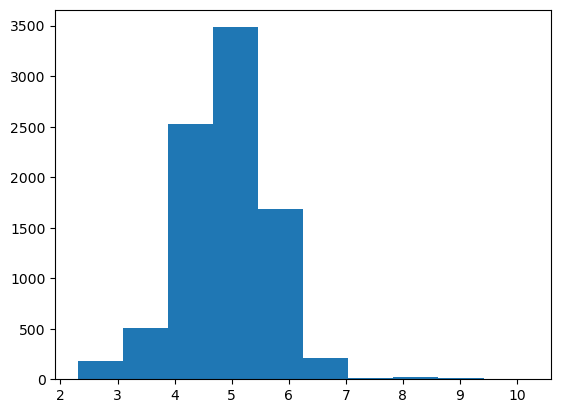

In [791]:

plt.hist(Target)
plt.show()


### One Hot encoding

In [659]:
lab1=LabelEncoder()
new_feature=Feature.apply(lab1.fit_transform)

In [660]:
new_feature.shape

(8631, 46)

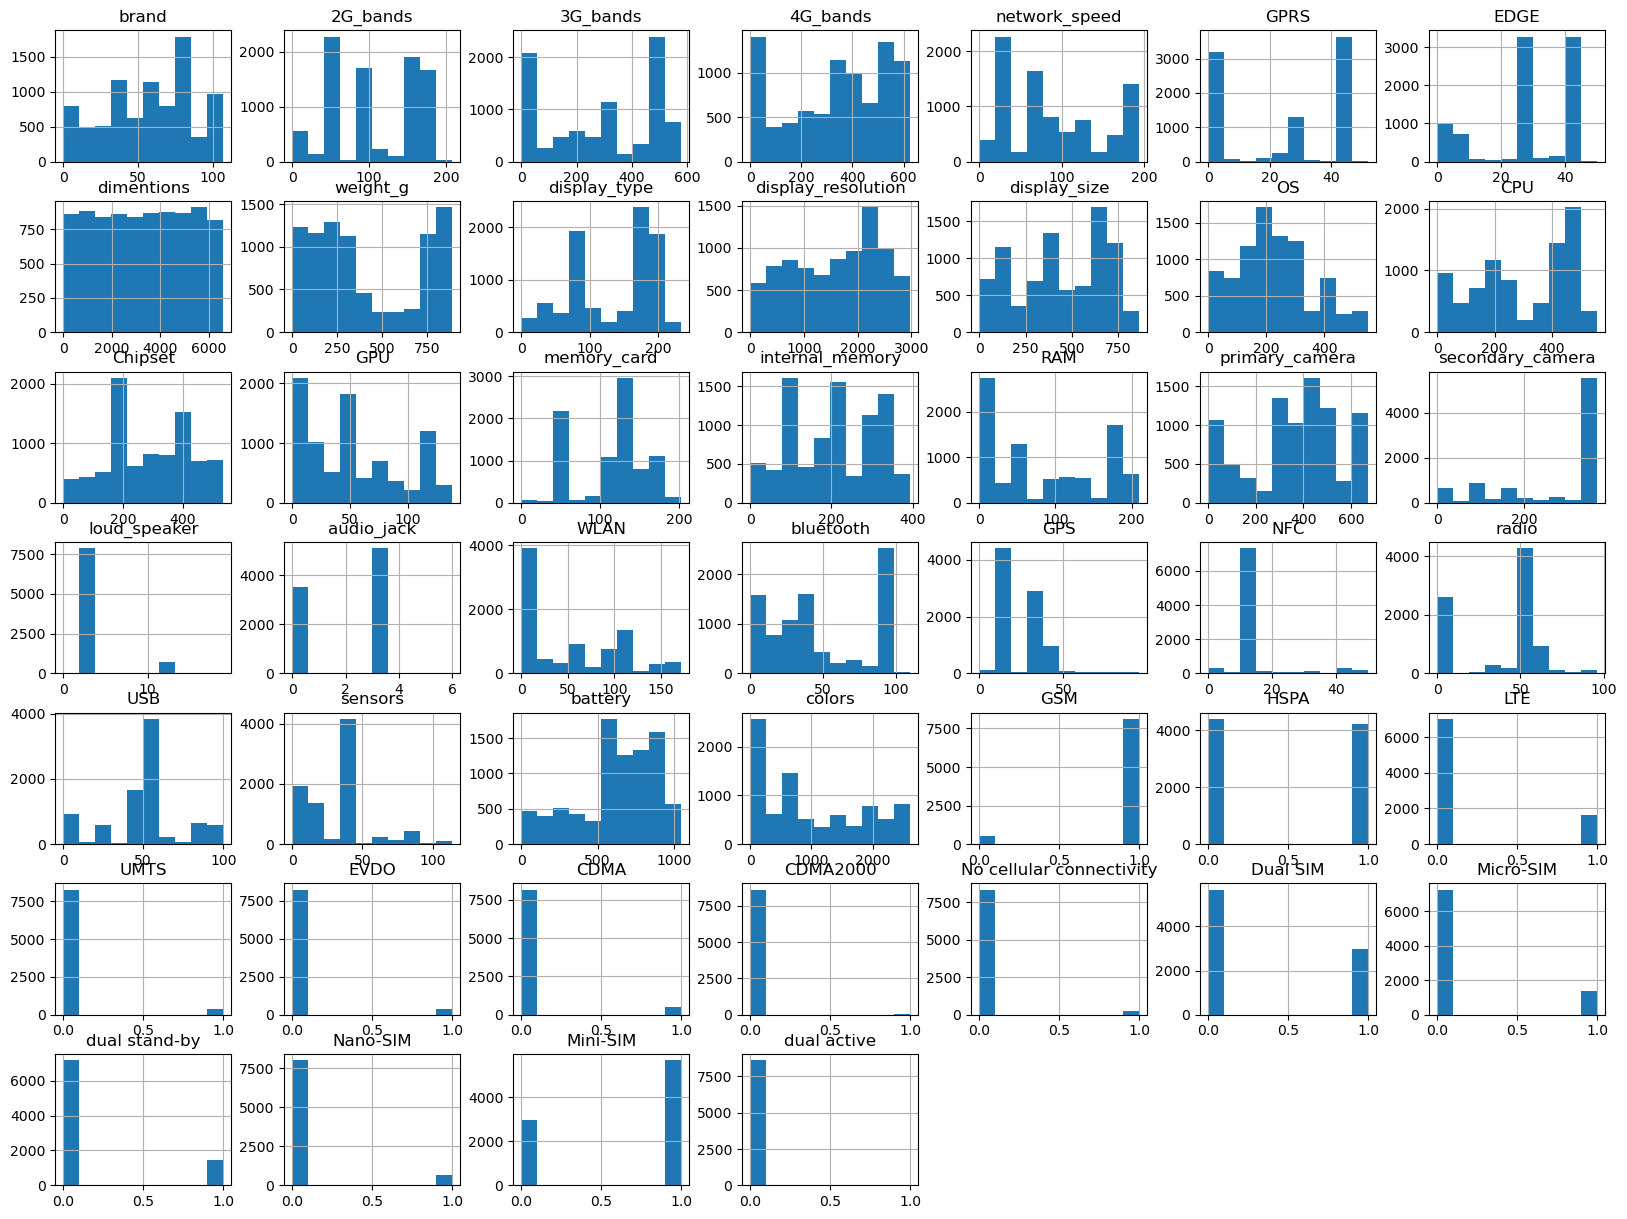

In [661]:
import matplotlib.pyplot as plt
new_feature.hist(bins=10, figsize=(20,15))
plt.show()

<Axes: >

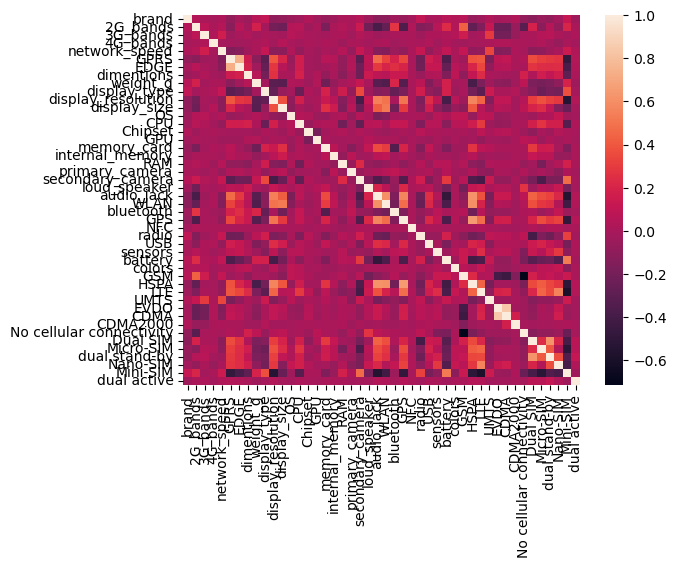

In [662]:
import seaborn as sns
corr = new_feature.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [665]:
new_feature

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,1,101,226,388,104,45,43,5101,450,77,2852,722,281,460,260,75,99,101,58,83,98,3,3,32,40,39,43,2,53,38,239,221,1,1,1,0,0,0,0,0,1,1,0,1,0,0
1,1,109,5,0,123,45,43,4742,333,77,2587,56,281,396,220,78,130,194,114,84,155,3,3,98,40,30,10,2,53,78,989,658,1,1,1,0,0,0,0,0,1,1,1,0,0,0
2,1,109,5,0,26,45,43,2184,862,77,2299,738,281,457,209,75,118,347,3,514,83,3,3,161,96,30,10,2,53,38,674,658,1,1,1,0,0,0,0,0,1,1,1,0,0,0
3,1,5,566,368,33,28,29,5384,377,77,577,348,281,460,243,73,119,103,58,412,83,18,3,26,96,11,10,50,53,0,330,221,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,43,471,33,123,45,43,4718,320,77,2561,731,263,396,220,79,134,194,114,102,45,3,3,112,48,30,10,2,53,42,988,495,1,1,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,101,43,574,564,194,1,0,346,833,182,1160,414,181,515,159,50,168,83,134,362,367,3,0,0,20,11,6,2,4,22,822,221,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8627,101,43,574,346,194,1,0,623,833,182,684,309,239,515,228,72,168,318,51,274,367,3,0,0,20,11,42,2,4,0,525,623,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8628,101,43,574,609,194,1,0,623,833,182,684,309,181,445,433,19,168,283,3,274,367,3,0,0,20,11,10,2,4,0,525,2543,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8629,101,43,574,536,194,1,0,623,833,182,684,309,417,4,49,52,168,28,58,274,367,3,0,0,20,11,10,2,4,68,525,2543,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [666]:
Target

0       5.135798
1       5.521461
2       4.787492
3       5.438079
4       5.438079
          ...   
8626    4.787492
8627    4.248495
8628    5.736572
8629    5.192957
8630    5.075174
Name: approx_price_EUR, Length: 8631, dtype: float64

In [667]:
# separating data to train and test
X_train, X_test, y_train, y_test=train_test_split(new_feature,Target,test_size=0.30, random_state = 10)

scaler = preprocessing.StandardScaler()

train_feature_scaled = scaler.fit_transform(X_train)

test_feature_scaled = scaler.transform(X_test)

train_feature_scaled_df = pd.DataFrame(data=train_feature_scaled, index=list(range(len(train_feature_scaled))), columns=new_feature.columns)

test_feature_scaled_df = pd.DataFrame(data=test_feature_scaled, index=list(range(len(test_feature_scaled))), columns=new_feature.columns)

In [668]:
train_feature_scaled_df.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,-0.802365,0.049385,-0.010940,-0.494097,0.723799,1.023506,0.944575,0.483880,-0.591713,-0.855223,1.062537,-1.666583,0.457525,0.582684,-1.581811,1.055620,0.310815,-0.100578,0.430662,1.203295,0.472853,-0.250092,0.827284,-0.629918,0.862965,1.961847,0.872543,0.490738,-0.879511,2.211990,-1.562783,0.017310,0.256531,1.019221,2.092688,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.390665,-0.436285,2.233185,3.607803,-1.371416,-0.051533
1,1.122638,-0.088844,-0.337958,-0.712713,-0.259921,0.291307,0.534295,0.395163,1.586821,-0.938472,0.911554,1.253463,-0.209840,1.000522,1.586957,0.207966,0.383201,1.328406,-1.143119,-1.665007,-1.086055,3.179664,0.827284,0.073745,-0.267338,0.566116,-0.278388,-1.421796,1.463098,-1.348276,-2.321355,-0.342142,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.390665,-0.436285,2.233185,-0.277177,-1.371416,-0.051533
2,0.632637,-1.091004,0.975303,-0.822021,-1.143601,1.023506,0.944575,0.954921,0.310099,0.992911,1.450259,1.034137,-0.233675,1.000522,0.933909,1.703826,0.407330,1.328406,-1.143119,-0.459416,-1.582467,-0.250092,0.827284,0.869995,-0.267338,5.120606,-0.163295,0.490738,0.181293,-1.348276,-1.448426,1.727804,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.719081,2.292078,-0.447791,-0.277177,-1.371416,-0.051533
3,0.842638,0.740529,-1.344964,0.126972,1.057263,0.134408,-0.012746,1.435996,1.512514,-1.104971,1.637477,1.713617,-1.639908,-0.547938,-0.587397,0.108242,-1.378203,-1.183990,-0.777777,0.746175,0.725413,-0.250092,-1.206751,-0.944714,1.260099,-0.829615,-0.278388,0.490738,-1.984516,-0.810097,1.509623,-0.989155,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.719081,-0.436285,-0.447791,-0.277177,0.729173,-0.051533
4,0.912638,0.740529,-1.344964,-0.454348,-0.259921,1.023506,0.944575,-1.207540,1.441585,1.275959,-0.053524,0.014916,0.290684,1.412216,0.689016,-1.213101,1.227710,0.618584,-0.370280,-0.017366,0.629614,-0.250092,0.827284,0.166332,-0.878313,-0.829615,-1.199132,0.132138,-1.984516,0.390458,-0.400148,1.613771,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.719081,-0.436285,-0.447791,-0.277177,0.729173,-0.051533


In [669]:
test_feature_scaled_df.head()

,brand,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,dimentions,weight_g,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,GSM,HSPA,LTE,UMTS,EVDO,CDMA,CDMA2000,No cellular connectivity,Dual SIM,Micro-SIM,dual stand-by,Nano-SIM,Mini-SIM,dual active
0,-1.642367,1.224331,1.426899,-0.712713,1.724191,-1.068490,-0.012746,1.480882,1.414565,0.659914,-1.091074,-0.591456,0.338353,1.098837,0.548017,-0.440240,-0.195890,0.637264,-0.370280,-1.780542,0.890884,-0.250092,-1.206751,-0.944714,-1.275446,-0.829615,3.519682,0.490738,-2.028716,0.224865,0.914964,-0.989155,0.256531,-0.981141,-0.477854,4.763423,-0.2163,-0.243829,-0.065746,-0.18552,-0.719081,-0.436285,-0.447791,-0.277177,0.729173,-0.051533
1,1.367639,1.379838,-1.344964,1.130620,-0.259921,1.023506,0.944575,0.225652,-0.118853,-0.938472,0.948998,1.253463,-0.209840,-0.166967,-0.683870,0.207966,0.383201,1.328406,-0.370280,0.746175,-1.582467,-0.250092,0.827284,1.129239,-0.267338,0.566116,-0.278388,-1.421796,1.463098,-0.437511,1.273284,-0.447498,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.390665,-0.436285,-0.447791,-0.277177,-1.371416,-0.051533
2,0.282637,-0.088844,0.975303,1.095840,-1.143601,1.023506,0.944575,0.416286,-1.118614,-0.938472,0.904307,0.832013,-0.360792,0.951365,1.186223,-1.063515,0.407330,0.151596,-1.143119,0.746175,-2.122424,-0.250092,0.827284,1.129239,-0.603374,0.566116,-0.278388,-1.421796,0.181293,0.224865,0.167828,-0.447498,0.256531,1.019221,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.390665,-0.436285,-0.447791,-0.277177,-1.371416,-0.051533
3,1.577639,0.740529,-1.344964,-1.671643,-1.360353,0.134408,-0.012746,1.599171,1.168002,-1.571167,0.676022,-1.799899,1.514186,-1.008789,1.468221,1.454516,-1.378203,-0.137937,-0.370280,-0.459416,0.629614,-0.593068,-1.206751,-0.944714,1.260099,-0.829615,3.289496,0.490738,-1.100512,0.390458,0.518524,0.359409,0.256531,-0.981141,-0.477854,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,-0.719081,-0.436285,-0.447791,-0.277177,0.729173,-0.051533
4,-0.522365,1.016987,0.975303,1.095840,-0.960196,1.023506,0.944575,0.085184,-0.753837,0.992911,0.624084,0.849215,0.433690,1.104982,1.646325,1.903275,0.383201,1.328406,-1.143119,0.334265,-0.772532,-0.250092,0.827284,1.129239,-0.267338,0.566116,-0.278388,-1.421796,0.181293,-1.348276,-2.325167,-0.447498,0.256531,1.019221,2.092688,-0.209933,-0.2163,-0.243829,-0.065746,-0.18552,1.390665,-0.436285,-0.447791,-0.277177,-1.371416,-0.051533


#Select the model and Evaluate

In [671]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [672]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

colnames = new_feature.columns

lr = LinearRegression()
lr.fit(train_feature_scaled_df,y_train)
rfe = RFE(lr, n_features_to_select=5, verbose =3 )
rfe.fit(train_feature_scaled_df,y_train)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 fe

In [673]:
lr_pred = lr.predict(test_feature_scaled)
r2_score(y_test, lr_pred)

0.21642410088322073

In [674]:
ranks

{'RFE': {'brand': 0.44,
  '2G_bands': 0.78,
  '3G_bands': 0.85,
  '4G_bands': 0.83,
  'network_speed': 0.49,
  'GPRS': 0.68,
  'EDGE': 0.51,
  'dimentions': 0.37,
  'weight_g': 0.2,
  'display_type': 0.66,
  'display_resolution': 0.0,
  'display_size': 0.46,
  'OS': 0.76,
  'CPU': 0.93,
  'Chipset': 0.73,
  'GPU': 0.29,
  'memory_card': 0.56,
  'internal_memory': 1.0,
  'RAM': 0.71,
  'primary_camera': 0.59,
  'secondary_camera': 0.17,
  'loud_speaker': 0.05,
  'audio_jack': 0.02,
  'WLAN': 0.88,
  'bluetooth': 0.54,
  'GPS': 0.0,
  'NFC': 0.95,
  'radio': 0.12,
  'USB': 0.39,
  'sensors': 0.34,
  'battery': 0.32,
  'colors': 0.41,
  'GSM': 0.22,
  'HSPA': 0.1,
  'LTE': 0.07,
  'UMTS': 0.27,
  'EVDO': 0.24,
  'CDMA': 0.61,
  'CDMA2000': 0.9,
  'No cellular connectivity': 0.15,
  'Dual SIM': 0.0,
  'Micro-SIM': 0.8,
  'dual stand-by': 0.98,
  'Nano-SIM': 0.0,
  'Mini-SIM': 0.0,
  'dual active': 0.63}}

In [675]:
#Similarly It can be done with randomforestregressor model
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(train_feature_scaled_df,y_train)
ranks["RF"] = ranking(rf.feature_importances_, colnames)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50building tree 18 of 50
building tree 19 of 50

building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


In [676]:
ranks

{'RFE': {'brand': 0.44,
  '2G_bands': 0.78,
  '3G_bands': 0.85,
  '4G_bands': 0.83,
  'network_speed': 0.49,
  'GPRS': 0.68,
  'EDGE': 0.51,
  'dimentions': 0.37,
  'weight_g': 0.2,
  'display_type': 0.66,
  'display_resolution': 0.0,
  'display_size': 0.46,
  'OS': 0.76,
  'CPU': 0.93,
  'Chipset': 0.73,
  'GPU': 0.29,
  'memory_card': 0.56,
  'internal_memory': 1.0,
  'RAM': 0.71,
  'primary_camera': 0.59,
  'secondary_camera': 0.17,
  'loud_speaker': 0.05,
  'audio_jack': 0.02,
  'WLAN': 0.88,
  'bluetooth': 0.54,
  'GPS': 0.0,
  'NFC': 0.95,
  'radio': 0.12,
  'USB': 0.39,
  'sensors': 0.34,
  'battery': 0.32,
  'colors': 0.41,
  'GSM': 0.22,
  'HSPA': 0.1,
  'LTE': 0.07,
  'UMTS': 0.27,
  'EVDO': 0.24,
  'CDMA': 0.61,
  'CDMA2000': 0.9,
  'No cellular connectivity': 0.15,
  'Dual SIM': 0.0,
  'Micro-SIM': 0.8,
  'dual stand-by': 0.98,
  'Nano-SIM': 0.0,
  'Mini-SIM': 0.0,
  'dual active': 0.63},
 'RF': {'brand': 0.67,
  '2G_bands': 0.36,
  '3G_bands': 0.38,
  '4G_bands': 0.51,
  '

In [677]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [678]:
dr = DecisionTreeRegressor()
dr.fit(train_feature_scaled_df,y_train)
drimp = dr.feature_importances_


In [679]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(train_feature_scaled_df,y_train)
rfrimp = rfr.feature_importances_

In [680]:
gbr =  GradientBoostingRegressor(n_estimators=100)
gbr.fit(train_feature_scaled_df,y_train)
gbrimp = gbr.feature_importances_

In [681]:
abr =  AdaBoostRegressor(n_estimators=100)
abr.fit(train_feature_scaled_df,y_train)
abrimp = abr.feature_importances_

In [682]:
#lets create a data frame that has all these values
d = {'Decision Tree':drimp, 'Random Forest':rfrimp, 'Gradient Boost':gbrimp,'Ada boost':abrimp}

In [683]:
features = pd.DataFrame(data = d)
# lets check out features
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost
0,0.045996,0.044730,0.047297,0.041777
1,0.028209,0.023307,0.045452,0.087314
2,0.020402,0.024544,0.004516,0.003406
3,0.048136,0.032881,0.002804,0.012725
4,0.016585,0.024356,0.008112,0.014307


In [684]:
features['mean'] = features.mean(axis= 1)
# we forgot to add the names of the features
features['names'] = train_feature_scaled_df.columns.values

In [685]:
#lets check it out now
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost,mean,names
0,0.045996,0.044730,0.047297,0.041777,0.044950,brand
1,0.028209,0.023307,0.045452,0.087314,0.046071,2G_bands
2,0.020402,0.024544,0.004516,0.003406,0.013217,3G_bands
3,0.048136,0.032881,0.002804,0.012725,0.024136,4G_bands
4,0.016585,0.024356,0.008112,0.014307,0.015840,network_speed


#RandomForestRegressor with GridSearchCV

In [687]:
param_grid=[
{'n_estimators':[3,10,30,40,50],	'max_features':[10,14,18]},
{'n_estimators':[3,10],'max_features':[14,18]}]

forest_reg=RandomForestRegressor(random_state=0,n_jobs=-1)

rnd_grid_search=GridSearchCV(forest_reg,param_grid,cv=5,return_train_score=True)

rnd_grid_search.fit(train_feature_scaled_df,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid=[{'max_features': [10, 14, 18],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'max_features': [14, 18], 'n_estimators': [3, 10]}],
             return_train_score=True)

In [805]:
rr=RandomForestRegressor(max_features=18, n_estimators=50, n_jobs=-1,
                      random_state=0)

In [811]:
rr.fit(train_feature_scaled,y_train)

RandomForestRegressor(max_features=18, n_estimators=50, n_jobs=-1,
                      random_state=0)

In [813]:
rr.score(train_feature_scaled,y_train)

0.8971398222367961

In [815]:
rr.score(test_feature_scaled,y_test)

0.3304506370198914

nor much get testing value 33%

In [688]:
rnd_grid_search.cv_results_['mean_test_score']



array([0.04443247, 0.22909214, 0.27178713, 0.27844473, 0.28167919,
       0.03391039, 0.21213451, 0.27265851, 0.28239797, 0.28610835,
       0.03732159, 0.22186491, 0.28462472, 0.28856221, 0.28982216,
       0.03391039, 0.21213451, 0.03732159, 0.22186491])

In [689]:
rnd_grid_search.cv_results_['mean_train_score']



array([0.74618434, 0.85454431, 0.88864386, 0.89130655, 0.8946217 ,
       0.75037956, 0.85659143, 0.88891555, 0.89162194, 0.89491266,
       0.75311596, 0.85641525, 0.88890251, 0.89189367, 0.89494077,
       0.75037956, 0.85659143, 0.75311596, 0.85641525])

In [690]:
rnd_grid_search.score(test_feature_scaled_df, y_test)



0.3304506370198914

In [691]:
rnd_grid_search.score(train_feature_scaled_df, y_train)

0.8971398222367961

In [803]:
rnd_grid_search.best_estimator_

RandomForestRegressor(max_features=18, n_estimators=50, n_jobs=-1,
                      random_state=0)

In [692]:
y_pred=rnd_grid_search.predict(test_feature_scaled_df)
r2_score(y_test, y_pred)


0.3304506370198914

# Insights

#Linear Regression

Linear regression gave us a very bad r2 score.Lets try to plot the actual value and predicted value to see what is happening

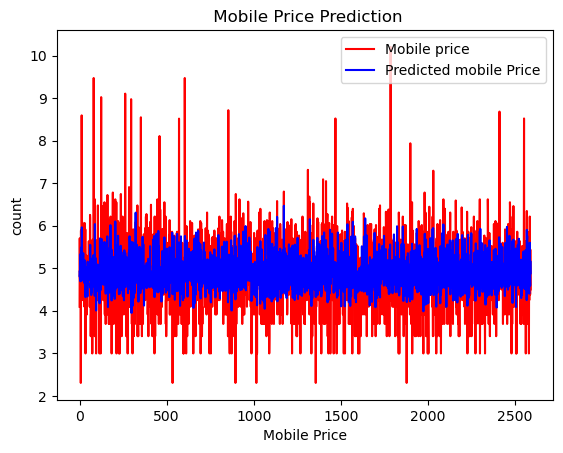

In [794]:
# Visualising the results
mobile_price_reg=lr.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'Mobile price')
plt.plot(mobile_price_reg, color = 'blue', label = 'Predicted mobile Price')
plt.xlabel('Mobile Price')
plt.ylabel('count')
plt.title(' Mobile Price Prediction')

plt.legend()
plt.show()



ok as we can see the model is not predicting very well because the model is too simple,lets try to plot residual(The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual)

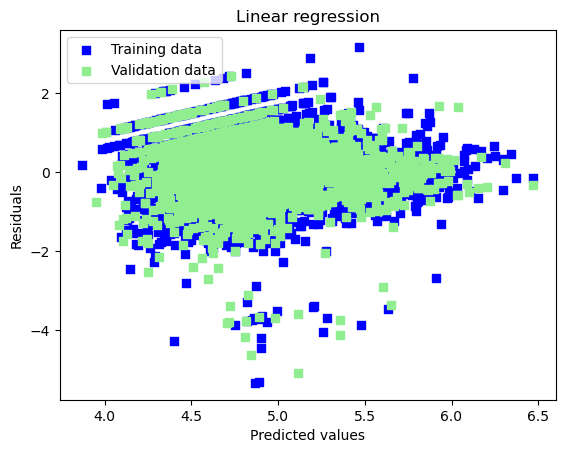

In [698]:
mobile_predictions_train=lr.predict(train_feature_scaled_df)
mobile_predictions_test=lr.predict(test_feature_scaled_df)
plt.scatter(mobile_predictions_train, mobile_predictions_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(mobile_predictions_test, mobile_predictions_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()



The residual plot shows a fairly random pattern,This random pattern indicates that a linear model provides a decent fit to the data. As we see here not exactly random that means our data is not purely linear

#RandomForestRegressor

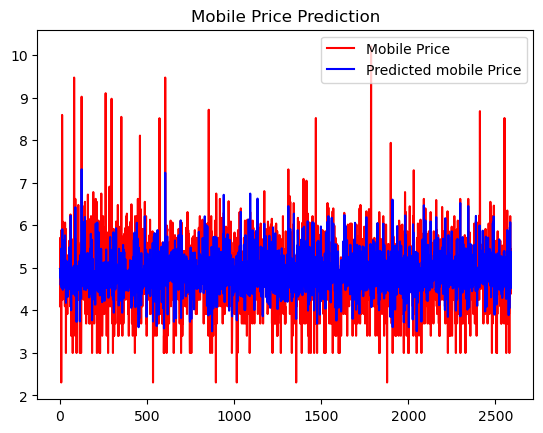

In [701]:
# Visualising the results
mobile_prediction_forest_reg = RandomForestRegressor()
forest_reg = mobile_prediction_forest_reg.fit(train_feature_scaled_df,y_train)

mobile_predictions_forest_reg_clf=forest_reg.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'Mobile Price')
plt.plot(mobile_predictions_forest_reg_clf, color = 'blue', label = 'Predicted mobile Price')
plt.title('Mobile Price Prediction')

plt.legend()
plt.show()



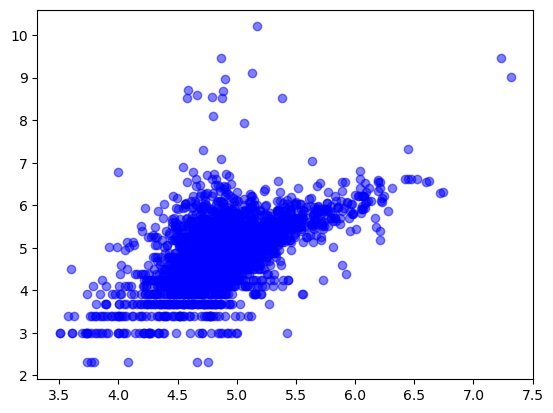

In [798]:

plt.scatter(mobile_predictions_forest_reg_clf, y_test.values, c='b', alpha=0.5)
plt.show()



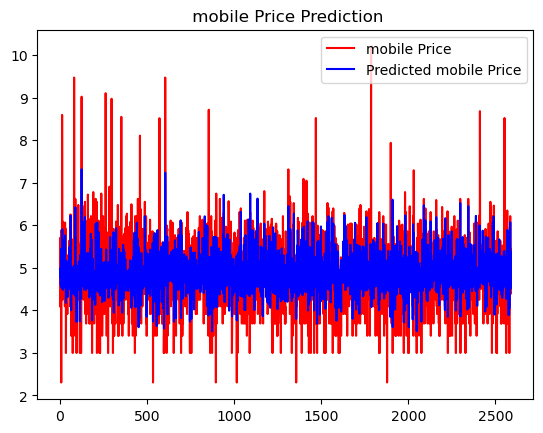

In [703]:
# Visualising the results
mobile_predictions_rnd_grid_search=rnd_grid_search.predict(test_feature_scaled_df)
plt.plot(y_test.values, color = 'red', label = 'mobile Price')
plt.plot(mobile_predictions_forest_reg_clf, color = 'blue', label = 'Predicted mobile Price')
plt.title(' mobile Price Prediction')

plt.legend()
plt.show()



Conclusion

In this work, we tried multiple algorithms such as linear regression and got performance around 42% which is poor result. Moreover, In RandomForestRegressor with best hyperparameters and cross validation,we achieved good improvement when we got an accuracy about 74%. Here we tried to find the best features through different methods and stated the rank and importance of features above. You can try more algorithms to further improve the performance and to get more robust results.